# **Stat 6500 Excerise Set 4**
    Authored by Brian Lesko, a Graduate Researcher and Teaching Associate, a Masters of mechanical engineering student, studying mechatronic controls, robotics, and machine learning.

    This documenet is originally an interactive python notebook

    Contents: 
    
A) Topics from *An Introduction to Statistical Learning* Section 6.5.2

    1. Chapter 7 Question 1

    2. Chapter 7 Question 11 (b) - (g)

        instead of simulating data, use Galtron's data on the heights of adult children and their parents
        focus on the subset of daughters, define X1 as fathers height, X2 as mothers height, and Y as daughters height. 
    
B) *Additional Exercises*
    
    1. Finding the form of the Smoother Matrix S_lambda in smoothing splines
        which maps Y to Y_hat



### Regression Splines

Regression splines are a method of fitting piecewise polynomial functions to data that join smoothly at certain points called knots.Regression splines were first introduced in the statistical literature in the 1940s by Charles W. Dunnett, who was a statistician working at the British War Office during World War II. Dunnett used splines to model the relationship between exposure to mustard gas and respiratory symptoms in soldiers.

However, the modern approach to regression splines is credited to Carl de Boor, who introduced the concept of B-splines in the 1960s. B-splines are a type of basis function that can be used to represent a smooth curve by a linear combination of basis functions. B-splines have several desirable properties, such as local support, computational efficiency, and flexibility in terms of the number and location of knots.

Since then, regression splines have become a popular tool in statistical modeling, particularly in the areas of machine learning, data science, and biostatistics. They are commonly used to model nonlinear relationships between variables, to capture interactions, and to handle non-monotonicity in the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Chapter 7 Question 1

    Using the Spline model with a knot at ξ

f(x)=β0 +β1x+β2x^2 +β3x^3 + (β4(x−ξ)^3++)

where (β4(x−ξ)^3++) = β4(x−ξ)^3 if x>ξ and 0 otherwise


    a. find a f1(x) = f(x) for x ≤ ξ

f1(x)=a1 +b1x+c1x^2 +d1x^3 

 where a1 b1 and d1 should be expressed in terms of β0 β1 β2 β3 and β4
 

    b. find f2(x) = f(x) for x > ξ

f2(x)=a2 +b2x+c2x2 +d2x3


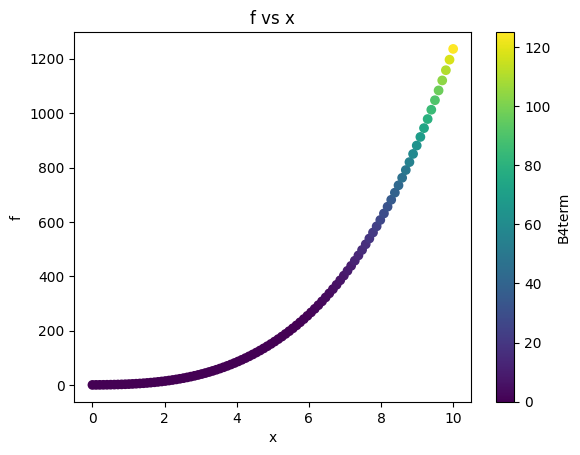

In [2]:
import numpy as np
import matplotlib.pyplot as plt

B0 = 1
B1 = 1
B2 = 1
B3 = 1 
B4 = 1

x = np.linspace(0, 10, 100)
e = 5

# set f values for each x in a for loop
f = []
colors = []
for i in range(len(x)):
    if x[i] < e:
        B4term = 0
    else:
        B4term = B4 * (x[i] - e) ** 3

    fnow = (B0 + B1 * x[i] + B2 * x[i] ** 2 + B3 * x[i] ** 3 + B4term)

    f.append(fnow)
    colors.append(B4term)

# plot f vs x with the color proportional to B4term
plt.scatter(x, f, c=colors, cmap='viridis')
plt.xlabel('x')
plt.ylabel('f')
plt.title('f vs x')
# add a colorbar with label
plt.colorbar(label='B4term')
plt.show()

# 1 a) 

To create an f1(x) equal to f(x) for x < e, the coefficients are easy to pick, they are just the same as f(x) without the piecewise term

Text(5.2, 20, 'e')

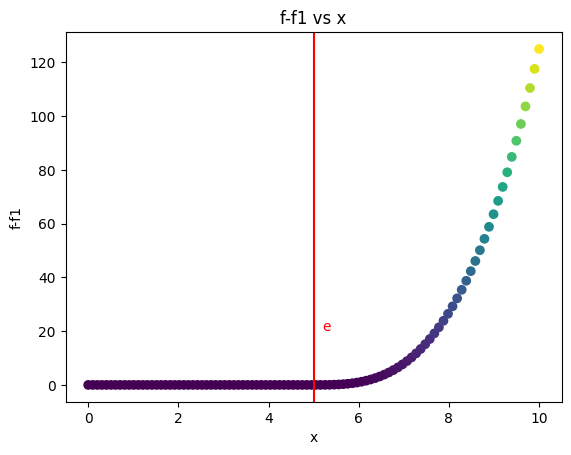

In [3]:

# f1(x) is equal to f(x) for x < e

# set f1 values for each x in a for loop
a1 = B0
b1 = B1
c1 = B2
d1 = B3
f1 = a1 + b1*x + c1*x**2 +d1*x**3 

#plot f-f1 vs x
plt.scatter(x, f-f1, c=colors, cmap='viridis')
# plot a vertical line at x = e
plt.axvline(x=e, color='r')
plt.xlabel('x')
plt.ylabel('f-f1')
plt.title('f-f1 vs x')
# label the vertical line
plt.text(e+.2, 20, 'e', color='r')


# 1 b)

To pick an f2(x) that is equal to f(x) when x > e, the B4 term in f(x) should be multiplied out and distributed into the coefficients. Resulting in the following: 

Text(5.2, 20, 'e')

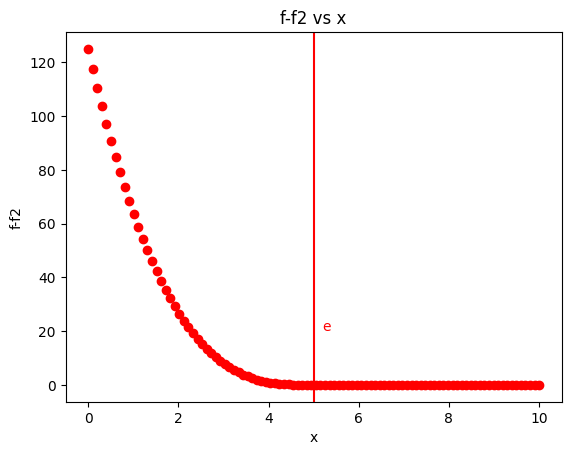

In [4]:

a2 = B0 - e**3
b2 = B1 + 3*e**2
c2 = B2 - 3*e
d2 = B3 + B4
f2 = a2 + b2*x + c2*x**2 +d2*x**3 

#plot f-f1 vs x
plt.scatter(x, f-f2, c='r')
# plot a vertical line at x = e
plt.axvline(x=e, color='r')
plt.xlabel('x')
plt.ylabel('f-f2')
plt.title('f-f2 vs x')
# label the vertical line
plt.text(e+.2, 20, 'e', color='r')

Combined

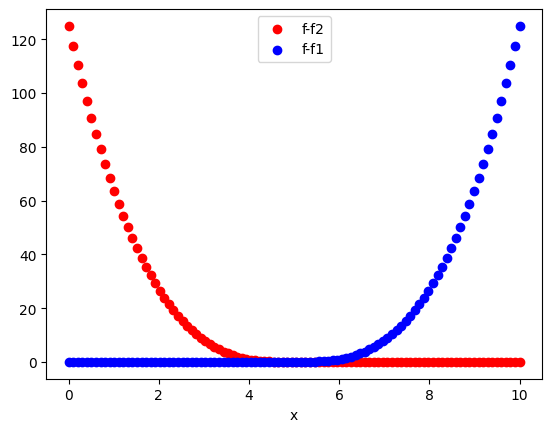

In [5]:
plt.scatter(x, f-f2, c='r')
plt.scatter(x, f-f1, c='b')
plt.xlabel('x')
# legend
plt.legend(['f-f2', 'f-f1'])


# 1 c)
show that the two functions are continuous at x = e 

In [6]:
# find the index of x that is closest to e
x = 5
f1 = a1 + b1*x + c1*x**2 +d1*x**3 
f2 = a2 + b2*x + c2*x**2 +d2*x**3 
print('The values of f1 and f2 are continuous at x = e')
print('The value of f1 where x is closest to e is',f1)
print('The value of f2 where x is closest to e is',f2)

The values of f1 and f2 are continuous at x = e
The value of f1 where x is closest to e is 156
The value of f2 where x is closest to e is 156


# 1 d)
Show that the first derivatives are equivelent at x = e

In [7]:
x = e

# the derivative of f1 
df1 = b1 + 2*c1*x + 3*d1*x**2

# the derivative of f2
df2 = b2 + 2*c2*x + 3*d2*x**2

print('The derivatives are continuous at x = e')
print('The value of df1 at x = e is',df1)
print('The value of df2 at x = e is',df2)


The derivatives are continuous at x = e
The value of df1 at x = e is 86
The value of df2 at x = e is 86


# 1 e) 
Show that the second derivatives are continuous at x = e

In [8]:
x = e
# The second derivative of f1
ddf1 = 2*c1 + 6*d1*x

# The second derivative of f2
ddf2 = 2*c2 + 6*d2*x

print('The second derivatives are continuous at x = e')
print('The value of ddf1 at x = e is',ddf1)
print('The value of ddf2 at x = e is',ddf2)

The second derivatives are continuous at x = e
The value of ddf1 at x = e is 32
The value of ddf2 at x = e is 32


Thus, f(x) is a cublic spline

 # 2. Chapter 7 Question 11 (b) - (g)

 "In Section 7.7, it was mentioned that GAMs are generally fit using a backfitting approach. The idea behind backfitting is actually quite simple. We will now explore backfitting in the context of multiple linear regression."

 For this question, Question 11, instead of simulating data as in (a), use Galton’s data on the heights of adult children and their parents posted on Carmen. Focusing on the subset of daughters, define X1 as father’s height, X2 as mother’s height, and Y as daughter’s height.

### Importing the data via CSV

In [9]:
# read a csv file from the current folder named galton.csv
import pandas as pd
# read the csv
df = pd.read_csv('galton.csv')
# print the first 5 rows
df.head()

# select rows from the df where ['Gender'] is equal to 'female'
df_female = df[df['Gender'] == 'female']
df_female.head()

Y = np.array(df_female['Height'])
X1 = np.array(df_female['Father'])
X2 = np.array(df_female['Mother'])


### Plotting the data

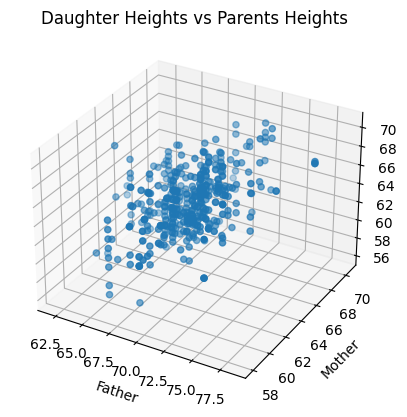

In [10]:
# plot the data as a 3d scatter plot
# imort matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y)
ax.set_xlabel('Father')
ax.set_ylabel('Mother')
ax.set_zlabel('Height')
ax.set_title('Daughter Heights vs Parents Heights')
plt.show()

    (b) Initialize βˆ1 to take on a value of your choice. It does not matter what value you choose.

B1 Choice: B1 = 1

In [11]:
B1 = 1

    (c) Keeping βˆ1 fixed, fit the model Y - B1*X1 = B0 + B2*X2 + e

In [20]:
# import linear regression
import numpy as np

# target transformation
new_target = Y - B1 * X1 
print(new_target.shape)
print(X2.shape)

# import the model
from sklearn.linear_model import LinearRegression
linregB1 = LinearRegression()

# fit the model
linregB1.fit(X2.reshape(-1, 1),new_target)

# extract the coefficient and call it B2
B2 = linregB1.coef_
print('B2 was found =',B2)

(453,)
(453,)
B2 was found = [0.30358374]


    (d) Keeping βˆ2 fixed, fit the model Y - B2*X2 = B0 + B1*X1 + e

In [21]:
# target transformation
new_target = Y - B2 * X2
print(new_target.shape)
print(X1.shape)

# create a model
linregB2 = LinearRegression()

# fit the model
linregB2.fit(X1.reshape(-1, 1),new_target)

# extract the coefficient and call it B1
B1 = linregB2.coef_
print('B1 was found =',B1)

(453,)
(453,)
B1 was found = [0.37352788]


In [22]:
# target transformation
new_target = Y - B1 * X1 
print(new_target.shape)
print(X2.shape)

# import the model
from sklearn.linear_model import LinearRegression
linregB1 = LinearRegression()

# fit the model
linregB1.fit(X2.reshape(-1, 1),new_target)

# extract the coefficient and call it B2
B2 = linregB1.coef_
print('B2 was found =',B2)

(453,)
(453,)
B2 was found = [0.30358374]


This is the same estimate as the first guess! 

    (e) Write a for loop to repeat (c) and (d) 1,000 times. Report the estimates of βˆ0 , βˆ1 , and βˆ2 at each iteration of the for loop.


Text(0.5, 1.0, 'Coefficients vs iteration')

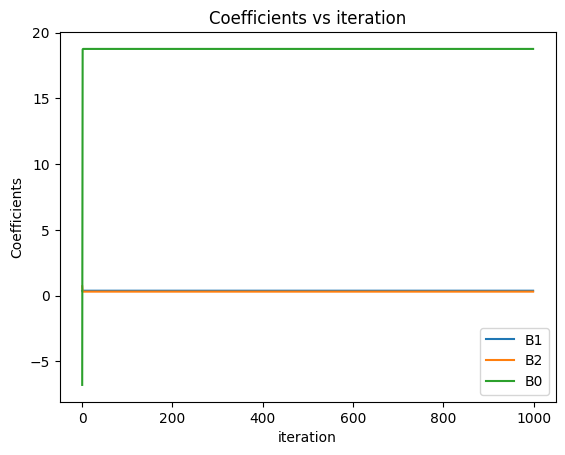

In [31]:
n = 1000
B1 = 1

B2s=[]
B1s=[]
B0s=[]
# a for loop to go over i for every n 
for i in range(n):
    # target transformation
    new_target = Y - B1 * X1 

    # import the model
    from sklearn.linear_model import LinearRegression
    linregB1 = LinearRegression()

    # fit the model
    linregB1.fit(X2.reshape(-1, 1),new_target)

    # extract the coefficient and call it B2
    B2 = linregB1.coef_
    B2s.append(B2)

    # target transformation
    new_target = Y - B2 * X2

    # create a model
    linregB2 = LinearRegression()

    # fit the model
    linregB2.fit(X1.reshape(-1, 1),new_target)

    # extract the coefficient and call it B1
    B1 = linregB2.coef_
    B1s.append(B1)

    # save the intercept term as B0
    B0 = linregB2.intercept_
    B0s.append(B0)

# plot iteration vs B1
plt.plot(range(n), B1s)
plt.plot(range(n), B2s)
plt.plot(range(n), B0s)
plt.xlabel('iteration')
plt.ylabel('Coefficients')
plt.legend(['B1', 'B2', 'B0'])
plt.title('Coefficients vs iteration')

There isnt much change over the course of 1000 iterations, it seems like one iteration could have been enough

    (f) Compare your answer in (e) to the results of simply performing multiple linear regression to predict Y using X1 and X2. Use the abline() function to overlay those multiple linear regression coefficient estimates on the plot obtained in (e).

18.757701359450984
[0.37352788 0.30358374]


Text(0.5, 1.0, 'Coefficients vs iteration')

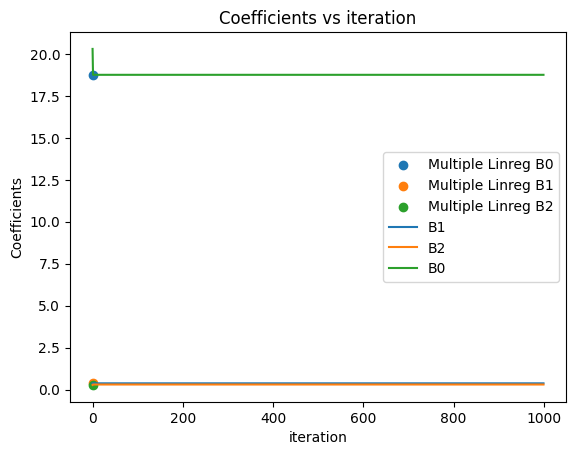

In [28]:
# use sklearn to fit multiple linear regression 

target = Y 
features = np.column_stack((X1, X2))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(features,target)

B0m = linreg.intercept_
Bs = linreg.coef_

print(B0m)
print(Bs)

# plot iteration vs B1
plt.scatter(1,B0m)
plt.scatter(1,Bs[0])
plt.scatter(1,Bs[1])
plt.plot(range(n), B1s)
plt.plot(range(n), B2s)
plt.plot(range(n), B0s)
plt.xlabel('iteration')
plt.ylabel('Coefficients')
plt.legend(['Multiple Linreg B0','Multiple Linreg B1','Multiple Linreg B2','B1', 'B2', 'B0'])
plt.title('Coefficients vs iteration')

The multiple linear regression estimates are are equal to the estimation of keeping a coefficient constant after an interation

    (g) On this data set, how many backfitting iterations were required in order to obtain a “good” approximation to the multiple re- gression coefficient estimates?

Only one backfitting iteration was necessary for starting with B1 = 1, Changing the initial estimate of B1 seems to achieve the same result for B1 = 10 and B1 = 100 